In [7]:
#Library that required

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap

In [8]:
#Open the data

data = xr.open_dataset('ERA5.nc')
data

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 241, time: 24)
Coordinates:
  * longitude  (longitude) float32 90.0 90.25 90.5 90.75 ... 149.5 149.75 150.0
  * latitude   (latitude) float32 15.0 14.75 14.5 14.25 ... -14.5 -14.75 -15.0
  * time       (time) datetime64[ns] 2023-04-01 ... 2023-04-01T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-04 13:47:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [9]:
#Define lat and lon variables

lat = data.latitude
lon = data.longitude

In [10]:
#Define u,v components of wind

wind_u = data.u10
wind_v = data.v10

In [11]:
#Calculate the wind speed by calculate the square root from the sum of u-v square

WS = np.sqrt(wind_u**2 + wind_v**2)

C:\Users\Dwiki\Anaconda3-1\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\Dwiki\Anaconda3-1\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


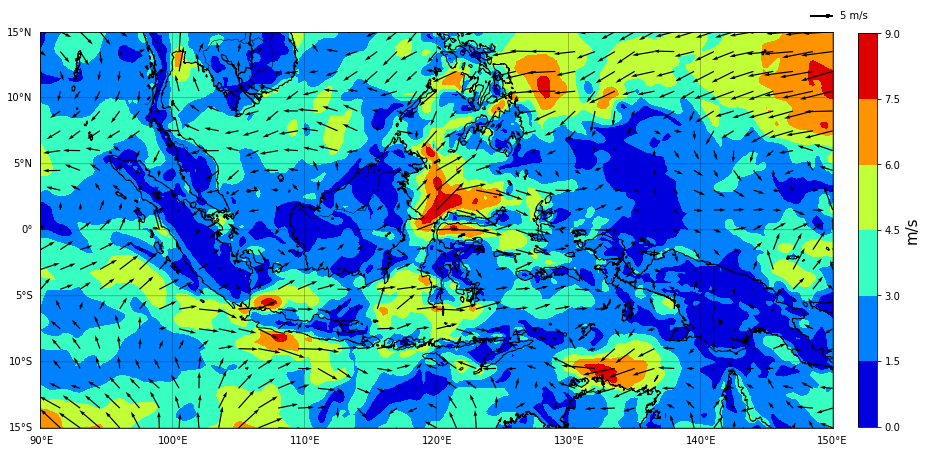

In [12]:
#Visualize the wind map

fig= plt.figure(figsize=(15,8))

m = Basemap(projection='cyl', llcrnrlon=90, llcrnrlat=-15, urcrnrlon=150, urcrnrlat=15, resolution='i')
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(-15,15+0.25,5)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(90,150+0.25,10)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

skip=6
cf = plt.contourf(lon,lat,WS[5,:,:], cmap='jet')
Q = plt.quiver(lon[::skip],lat[::skip],wind_u[5,::skip,::skip],wind_v[5,::skip,::skip], scale_units='xy', scale=3, width=0.0015)

qk = plt.quiverkey(Q, 
              1, 1.04,                  
               5,str(5)+' m/s',   
               labelpos='E',                
               coordinates='axes'
               )
cb = plt.colorbar(cf, fraction=0.0235, pad=0.03 )
cb.set_label('m/s',  fontsize=15)
plt.title(' ', fontsize=25)

plt.show()